In [3]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Read input file

input_file = pd.read_csv('./Final_Files/sample_refined_updated.csv')

# Shuffle data frame

input_file = input_file.sample(frac=1)
#input_file['mode'].head()

In [5]:
## Dropping fields (strings/objects)


#drop_list = ['analysis_url','track_id', 'track_href', 'type', 'uri', 
#             'artist_name', 'track_name', 'mode', 'key', 'time_signature', 'bbhot',
#             'duration_ms','liveness','valence','tempo','instrumentalness','energy',
#             'speechiness']

drop_list = ['analysis_url','track_id', 'track_href', 'type', 'uri', 
             'artist_name', 'track_name', 'time_signature', 'bbhot',]


train = input_file.drop(drop_list, axis = 1)

columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
           'liveness', 'loudness', 'speechiness', 'mode', 'key', 'tempo', 'valence', 'artist_popularity','artist_followers']

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 3917 to 2863
Data columns (total 15 columns):
acousticness         5000 non-null float64
danceability         5000 non-null float64
duration_ms          5000 non-null int64
energy               5000 non-null float64
instrumentalness     5000 non-null float64
key                  5000 non-null int64
liveness             5000 non-null float64
loudness             5000 non-null float64
mode                 5000 non-null int64
speechiness          5000 non-null float64
tempo                5000 non-null float64
valence              5000 non-null float64
popularity           5000 non-null int64
artist_popularity    5000 non-null int64
artist_followers     5000 non-null int64
dtypes: float64(9), int64(6)
memory usage: 625.0 KB


In [6]:
train.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity,artist_popularity,artist_followers
3917,0.0975,0.693,135000,0.576,0.000000,0,0.2070,-6.955,1,0.0868,159.978,0.691,72,79,641310
788,0.1970,0.770,187301,0.532,0.000000,4,0.0909,-7.127,0,0.1270,145.037,0.132,64,84,2457094
332,0.0476,0.808,227387,0.857,0.000888,1,0.7670,-5.404,1,0.0978,127.939,0.776,51,61,235636
4531,0.2490,0.882,204643,0.372,0.000000,7,0.1000,-11.346,0,0.1930,122.002,0.916,61,86,749924
4944,0.1990,0.630,222160,0.928,0.124000,9,0.1480,-2.787,0,0.0331,123.963,0.465,81,90,16492485


In [7]:
## Making a copy of dataframe target variable and assigning it to Y
Y = copy.deepcopy(train.popularity)
Y.shape

(5000,)

In [8]:
## Dropping the target attribute and making new dataframe

train_1 = train.drop("popularity", axis=1)
train_1.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist_popularity,artist_followers
3917,0.0975,0.693,135000,0.576,0.000000,0,0.2070,-6.955,1,0.0868,159.978,0.691,79,641310
788,0.1970,0.770,187301,0.532,0.000000,4,0.0909,-7.127,0,0.1270,145.037,0.132,84,2457094
332,0.0476,0.808,227387,0.857,0.000888,1,0.7670,-5.404,1,0.0978,127.939,0.776,61,235636
4531,0.2490,0.882,204643,0.372,0.000000,7,0.1000,-11.346,0,0.1930,122.002,0.916,86,749924
4944,0.1990,0.630,222160,0.928,0.124000,9,0.1480,-2.787,0,0.0331,123.963,0.465,90,16492485


In [9]:
## Creating standard scaler object

warnings.filterwarnings("ignore")

#scaler = StandardScaler()

scaler = MinMaxScaler()

## Fit scaler to features

scaler.fit(train_1)

# Transform features to scaled version

scaled_features = scaler.transform(train_1)

#Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.

df_feat = pd.DataFrame(scaled_features,columns=train_1.columns)
df_feat.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist_popularity,artist_followers
0,0.097889,0.712963,0.075536,0.576773,0.000000,0.000000,0.195330,0.820607,1.0,0.089855,0.726846,0.697980,0.79,0.014680
1,0.197789,0.792181,0.115137,0.532645,0.000000,0.363636,0.074317,0.816525,0.0,0.131470,0.658963,0.133333,0.84,0.056243
2,0.047788,0.831276,0.145489,0.858590,0.000888,0.090909,0.779029,0.857411,1.0,0.101242,0.581279,0.783838,0.61,0.005394
3,0.249998,0.907407,0.128268,0.372179,0.000000,0.636364,0.083802,0.716411,0.0,0.199793,0.554305,0.925253,0.86,0.017166
4,0.199797,0.648148,0.141531,0.929796,0.124000,0.818182,0.133834,0.919510,0.0,0.034265,0.563215,0.469697,0.90,0.377516


In [10]:
## Linear Regression Model

X = df_feat
y = Y

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

#print(lm.intercept_)

#lm.coef_

#X_train.columns

cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff']).sort_values('Coeff',ascending=[False])


cdf

#** How can you interpret these coefficients? **
#Interpreting the coefficients:
#Holding all other features fixed, a 1 unit increase in acousticness is associated with an increase of 2.258109 units of popularity score


,Coeff
artist_popularity,24.867221
artist_followers,10.075167
danceability,6.727067
loudness,4.791572
acousticness,4.275859
energy,2.865170
tempo,1.356947
key,1.126680
valence,1.005988
mode,0.273224


In [11]:
from sklearn import metrics

In [12]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

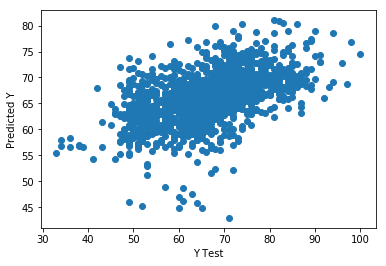

In [13]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [14]:
metrics.mean_absolute_error(y_test,predictions)

6.6632703231548005

In [15]:
metrics.mean_squared_error(y_test,predictions)

72.05261780263068

In [16]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

8.48838134173004

In [17]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.6632703231548005
MSE: 72.05261780263068
RMSE: 8.48838134173004


In [200]:
#sns.lmplot(x='danceability',y='popularity',data=train)